In [1]:
import imutils
import cv2
from  matplotlib import pyplot as plt

In [2]:
def scale_frame(scale: int, frm):

    width = int(frm.shape[1] * scale / 100)
    height = int(frm.shape[0] * scale / 100)
    dim = (width, height)
    frm = cv2.resize(frm, dim, interpolation=cv2.INTER_AREA)

    return frm

In [3]:
image = cv2.imread('barcode database/img (1).jpg')
image = scale_frame(40, image)

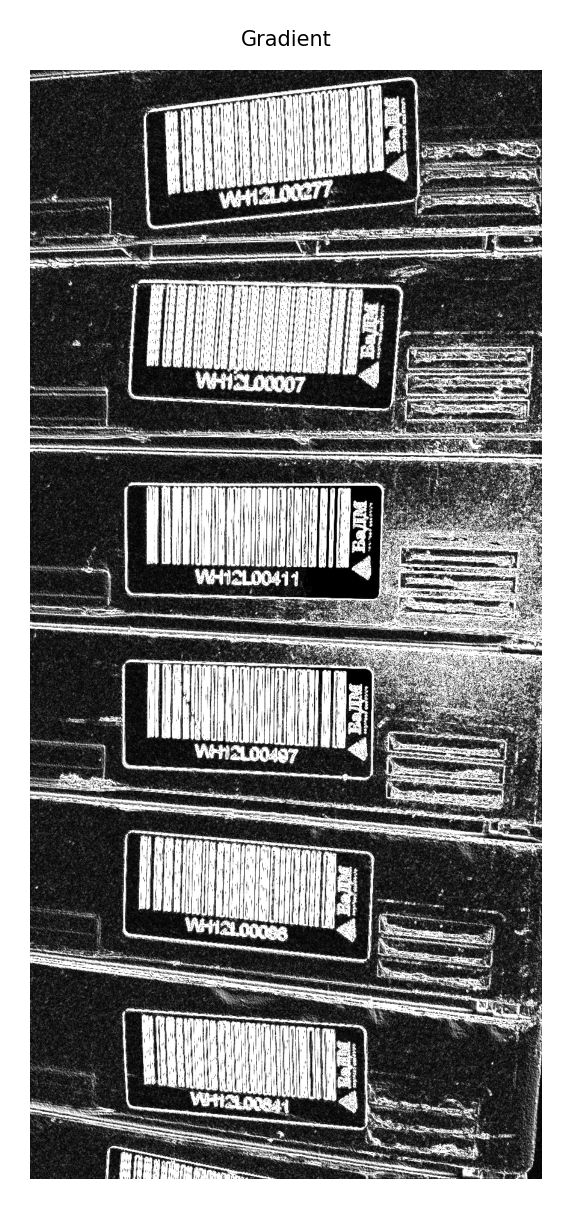

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
depth = cv2.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=depth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=depth, dx=0, dy=1, ksize=-1)

gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
 
plt.figure(dpi=300)
plt.imshow(gradient, 'gray')
plt.axis('off') 
plt.title(label='Gradient', fontsize=5)
plt.show()

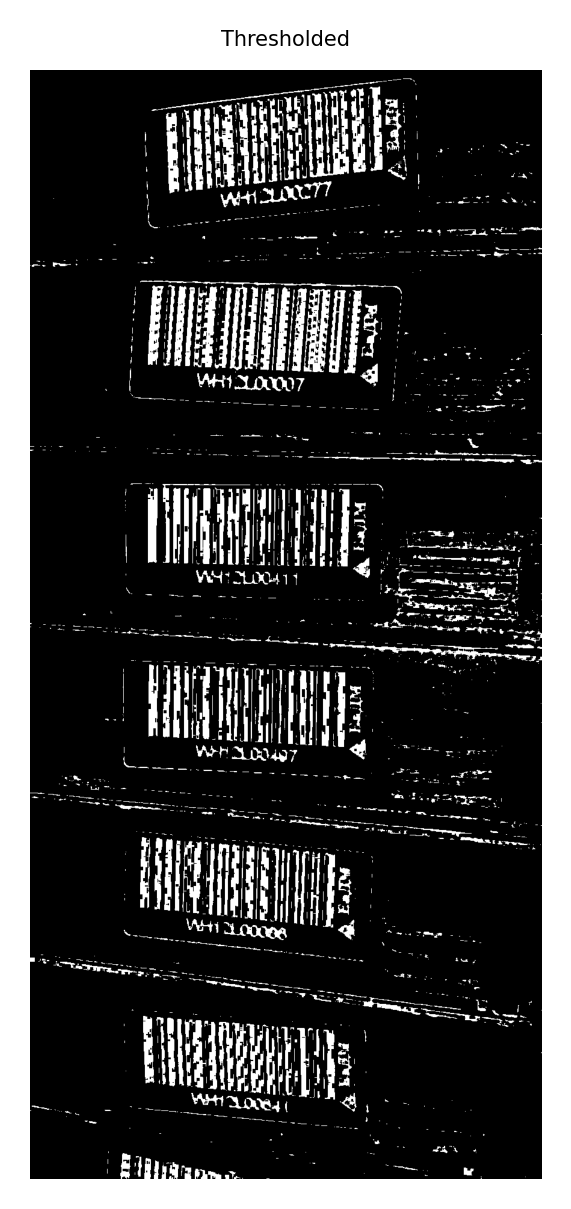

In [5]:
blurred = cv2.blur(gradient, (5, 5))
_, thresh = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

plt.figure(dpi=300)
plt.imshow(thresh, 'gray')
plt.axis('off') 
plt.title(label='Thresholded', fontsize=5)
plt.show()

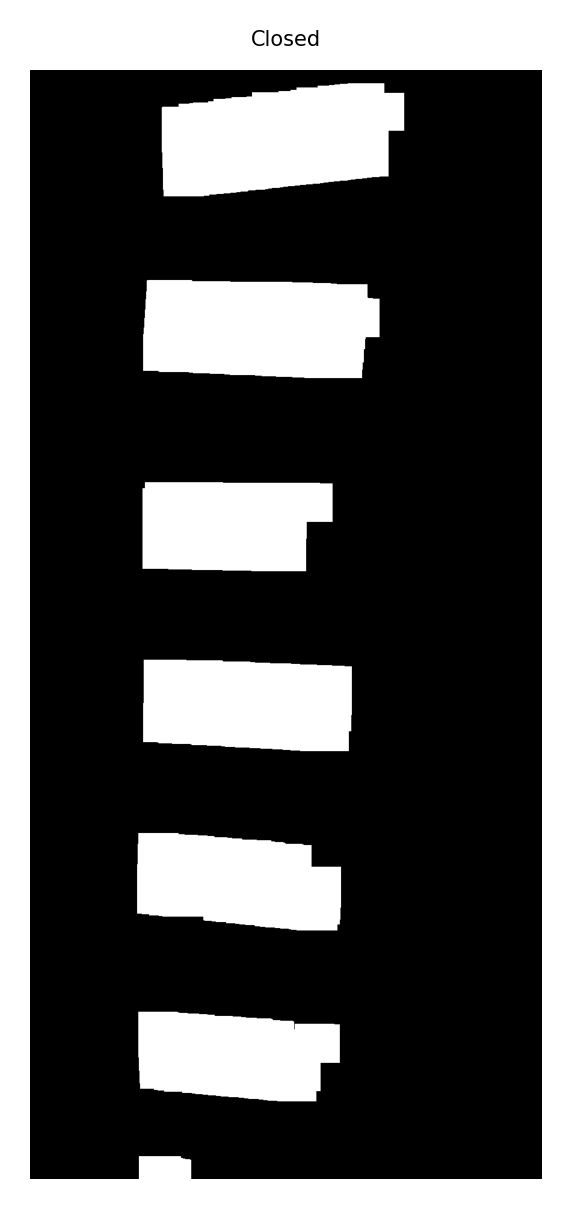

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

closed = cv2.erode(closed, None, iterations=20)
closed = cv2.dilate(closed, None, iterations=30)

plt.figure(dpi=300)
plt.imshow(closed, 'gray')
plt.axis('off') 
plt.title(label='Closed', fontsize=5)
plt.show()

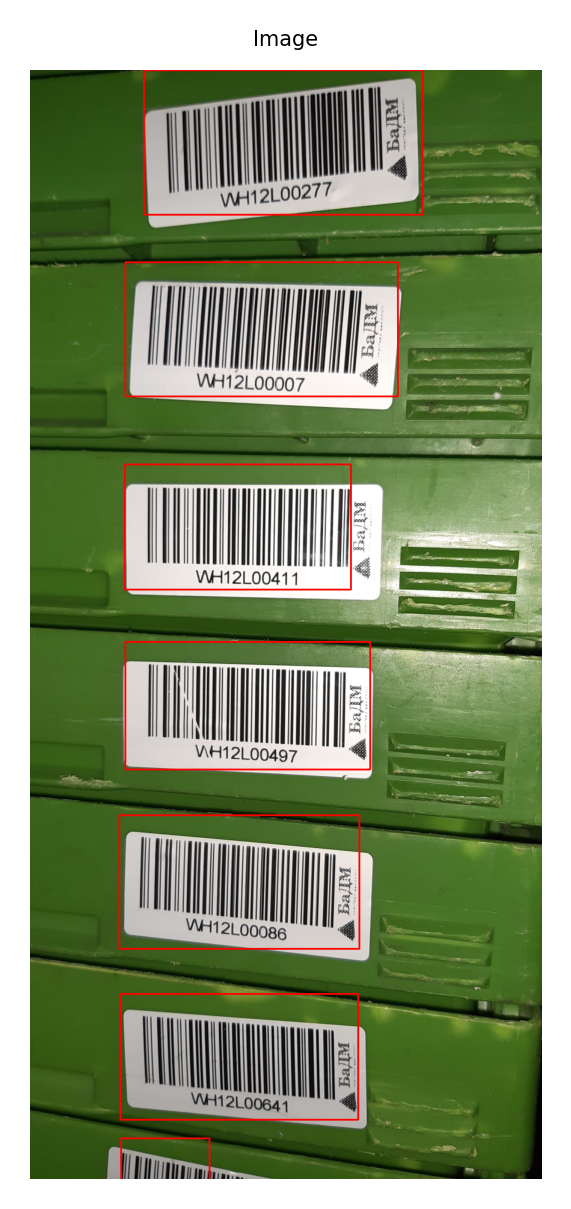

In [7]:
cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

indent = 30  # (px)
width, height, _ = image.shape

for cnt in cnts:

    x, y, w, h = cv2.boundingRect(cnt)

    x1 = x - indent
    if x1 < 0:
        x1 = 0

    y1 = y - indent
    if y1 < 0:
        y1 = 0

    x2 = x + w + indent
    y2 = y + h + indent

    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(dpi=300)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title(label='Image', fontsize=5)
plt.show()